### Analysis of Sales Dataset

> Created By **Israel Daniel**

> **Purpose:** Analyze sales data to identify trends, top-selling products, and revenue metrics for business decision-making.

> **Description:** In this project, we will dive into a large sales dataset to extract valuable insights. we will explore sales trends over time, identify the best-selling products, calculate revenue metrics such as total sales and profit margins, and create visualizations to present your findings effectively. This project showcases the ability to manipulate and derive insights from large datasets, enabling us to make data-driven recommendations for optimizing sales strategies.

In [1]:
# Import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the data using pandas package and making the first column to be used as serial numbers
sales_data = pd.read_csv("Sales Data.csv", index_col = 0)

In [3]:
# Number of rows and columns of the dataset.
sales_data.shape

(185950, 10)

In [4]:
sales_data.dtypes

Order_ID              int64
Product              object
Quantity_Ordered      int64
Price_Each          float64
Order_Date           object
Purchase_Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

In [5]:
# To identify the details of the sales data
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 13621
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity_Ordered  185950 non-null  int64  
 3   Price_Each        185950 non-null  float64
 4   Order_Date        185950 non-null  object 
 5   Purchase_Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Hour              185950 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 15.6+ MB


In [6]:
# Preview of the sales data
sales_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


Looking at the type of data for 'Order Date', it is not in it's correct data type. So we will change it to the correct datetime format using pandas.

In [7]:
# Converting the datatype of the Order_Date column to the datetime format
sales_data['Order_Date'] = pd.to_datetime(sales_data['Order_Date'])

In [8]:
#Confirming the change
sales_data.dtypes

Order_ID                     int64
Product                     object
Quantity_Ordered             int64
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
Month                        int64
Sales                      float64
City                        object
Hour                         int64
dtype: object

In [9]:
# To get a descriptive summary of the entire dataset
sales_data.describe()

,Order_ID,Quantity_Ordered,Price_Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [10]:
# Taking a sample view of the data
sales_data.sample(15)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour
1481,238094,iPhone,1,700.00,2019-08-02 13:48:00,"586 Main St, Austin, TX 73301",8,700.00,Austin,13
4658,145660,Google Phone,1,600.00,2019-01-20 12:19:00,"31 Jefferson St, Atlanta, GA 30301",1,600.00,Atlanta,12
8250,244562,Lightning Charging Cable,1,14.95,2019-08-07 15:00:00,"892 Lake St, Austin, TX 73301",8,14.95,Austin,15
13011,271774,AA Batteries (4-pack),1,3.84,2019-10-27 23:04:00,"485 Meadow St, San Francisco, CA 94016",10,3.84,San Francisco,23
14945,293081,Lightning Charging Cable,1,14.95,2019-11-01 21:12:00,"150 10th St, San Francisco, CA 94016",11,14.95,San Francisco,21
12124,307229,Vareebadd Phone,1,400.00,2019-12-31 03:56:00,"6 Center St, Austin, TX 73301",12,400.00,Austin,3
1347,142516,34in Ultrawide Monitor,1,379.99,2019-01-03 17:34:00,"640 Main St, Los Angeles, CA 90001",1,379.99,Los Angeles,17
8327,256137,Wired Headphones,1,11.99,2019-09-08 12:12:00,"732 Ridge St, Austin, TX 73301",9,11.99,Austin,12
3669,180075,Lightning Charging Cable,1,14.95,2019-04-09 20:00:00,"803 7th St, San Francisco, CA 94016",4,14.95,San Francisco,20
9970,171537,Apple Airpods Headphones,1,150.00,2019-03-30 22:53:00,"5 Lakeview St, San Francisco, CA 94016",3,150.00,San Francisco,22


In [11]:
# check for null values
sales_data.isna().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [12]:
# Looking at the unique values for each column
sales_data.nunique()

Order_ID            178437
Product                 19
Quantity_Ordered         9
Price_Each              17
Order_Date          142395
Purchase_Address    140787
Month                   12
Sales                   53
City                     9
Hour                    24
dtype: int64

Based on the preliminary wrangling, there seems to be no problem with the data. Nevertheless, we will still keep an eye for errors or issues with the data as further analysis is done.

#### At this point, I will save and export the data to an excel file 

In [13]:
sales_data.to_excel('sales_data_updated.xlsx')

# sales_data.to_csv('sales_data_updated.csv')

##### To start the analysis, we will begin by looking at various visualizations of seemingly interesting variables and see what we can get out of them.

In [14]:
# We will import the updated dataset to begin analysis
new_sales_data = pd.read_csv("sales_data_updated.csv", index_col = 0)

In [15]:
# Let's get a list of all the column names in the dataset
new_sales_data.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [16]:
# view a general info about the dataset
new_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 13621
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity_Ordered  185950 non-null  int64  
 3   Price_Each        185950 non-null  float64
 4   Order_Date        185950 non-null  object 
 5   Purchase_Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Hour              185950 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 15.6+ MB


In [17]:
new_sales_data['City'].value_counts()

 San Francisco    44732
 Los Angeles      29605
 New York City    24876
 Boston           19934
 Atlanta          14881
 Dallas           14820
 Seattle          14732
 Portland         12465
 Austin            9905
Name: City, dtype: int64

#### We can start with picking out variables of interest and I guess variables like *product*, *purchase_address*, *city*, *month*, *order_date*, *sales* and *quantity_ordered* should have some interesting insights. But we will first look at a correlation chart of all the quantitative variables.

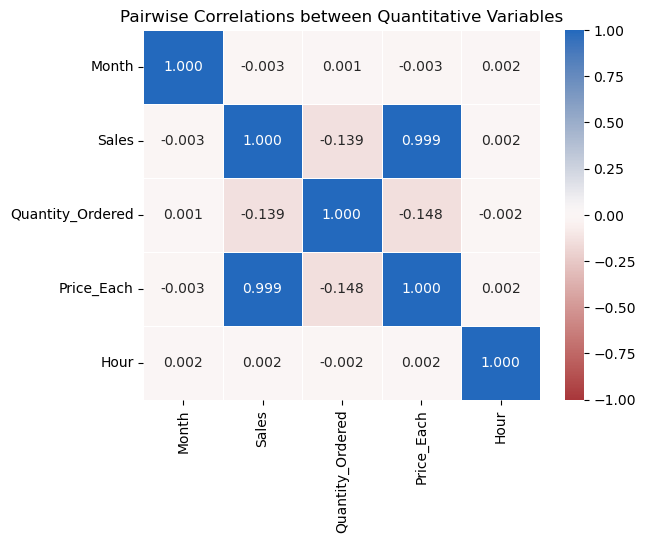

In [18]:
numeric_vars =['Month', 'Sales', 'Quantity_Ordered', 'Price_Each', 'Hour'] # Selecting variables of numeric or floating data types

sns.heatmap(new_sales_data[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r',
            linewidth=.5, center = 0, vmin=-1,vmax=1) # Plotting correlation graph with the numeric variables in the dataset
# Setting the plot title
plt.title('Pairwise Correlations between Quantitative Variables');

##### To understand this correlation analysis;

> Starting with the comparison of the first variable on the x axis (month) with it's first corresponding y variable (Price_Each), we can see that there's a near negative correlation (less than 0). That means that there's little to no correlation between them.

> Looking at the *Quantity_Ordered* and the *Price_Each*, there's a negative correlation. Which means that high valued products tend to be purchased in few quantities compared to low valued products. And since there's a lot more low valued products compared to the high valued ones purchased, this will certainly lead to a negative correlation.

> There seems to be a near negative correlation between *Sales* and *Quantity Order*. Based on the fact that there's a high frequency of products ordered in just one qauntity

In [19]:
# setting the color palette to one base color
base_color = sns.color_palette()[0]

In [20]:
# We will first define a visualization function to create a chart for each variable.
def univariate_view(column_name): 
    chart = sns.countplot(x = column_name, data = new_sales_data, color=base_color)
    return chart

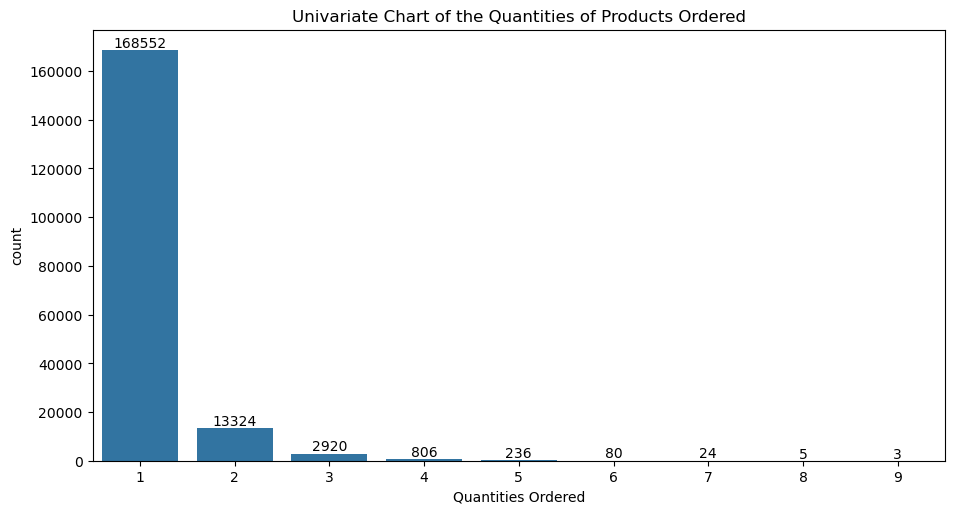

In [21]:
plt.figure(figsize=[11,5.6]) # setting the chart size
view_plot = univariate_view(new_sales_data['Quantity_Ordered']) # assigning the univariate plot to a vairiable.
plt.title('Univariate Chart of the Quantities of Products Ordered')
plt.xlabel('Quantities Ordered')

# a loop to display number of counts in each bar
for bar in view_plot.containers:
    view_plot.bar_label(bar);

> The highest frequency of quantities of products ordered is one, possessing a staggering value of 168552.
> Subsequent values from one are shown to be reducing in drastic levels upto the last number of quantites purchased, which is nine. This proves the fact that people tend to purchase fewer quantities of products. 

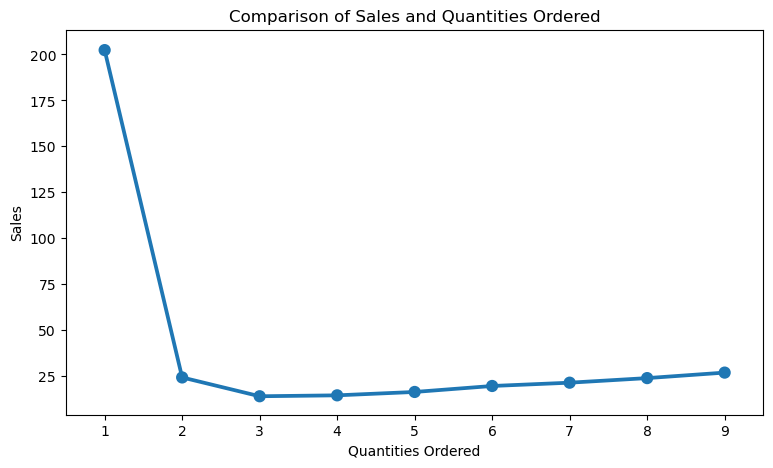

In [22]:
plt.figure(figsize=[9,5]) # Set figure size

# plotting the chart
sns.pointplot(data=new_sales_data, x="Quantity_Ordered", y="Sales")

# Adding title and changing the label of the x-axis
plt.title('Comparison of Sales and Quantities Ordered')
plt.xlabel('Quantities Ordered');

> Most of the products ordered are in one quantity.

#### We will create a function to group values in some columns which will enable us discover more insights.

In [23]:
# function to group values into categories then create a new column to store them
def group_column(new_column, column, categories): 
    new_sales_data[new_column] = new_sales_data[column].apply(lambda x: [key for key, values in categories.items() if x in values][0])
    return new_sales_data.sample(15)

In [24]:
# Define your groups
groupings = {
    'first quarter': [1, 2, 3],
    'second quarter': [4, 5, 6],
    'third quarter': [7, 8, 9], 
    'fourth quarter': [10, 11, 12]
}

group_column('Time_of_year', 'Month', groupings)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Time_of_year
10531,269414,27in 4K Gaming Monitor,1,389.99,2019-10-12 17:56:00,"215 Willow St, San Francisco, CA 94016",10,389.99,San Francisco,17,fourth quarter
2530,225341,27in 4K Gaming Monitor,1,389.99,2019-07-13 10:10:00,"780 Center St, New York City, NY 10001",7,389.99,New York City,10,third quarter
9116,268055,iPhone,1,700.00,2019-10-10 15:56:00,"476 Willow St, Los Angeles, CA 90001",10,700.00,Los Angeles,15,fourth quarter
3666,282307,Vareebadd Phone,1,400.00,2019-11-03 21:38:00,"297 6th St, Austin, TX 73301",11,400.00,Austin,21,fourth quarter
4334,227055,USB-C Charging Cable,1,11.95,2019-07-12 19:42:00,"501 North St, Boston, MA 02215",7,11.95,Boston,19,third quarter
60,222970,AAA Batteries (4-pack),1,2.99,2019-07-09 11:08:00,"594 Church St, Atlanta, GA 30301",7,2.99,Atlanta,11,third quarter
4463,299907,AA Batteries (4-pack),1,3.84,2019-12-16 20:57:00,"66 7th St, Dallas, TX 75001",12,3.84,Dallas,20,fourth quarter
6263,254153,iPhone,1,700.00,2019-09-03 02:24:00,"586 Forest St, Austin, TX 73301",9,700.00,Austin,2,third quarter
16849,275430,Google Phone,1,600.00,2019-10-04 06:16:00,"367 North St, San Francisco, CA 94016",10,600.00,San Francisco,6,fourth quarter
4361,154658,USB-C Charging Cable,1,11.95,2019-02-07 14:27:00,"280 Wilson St, Dallas, TX 75001",2,11.95,Dallas,14,first quarter


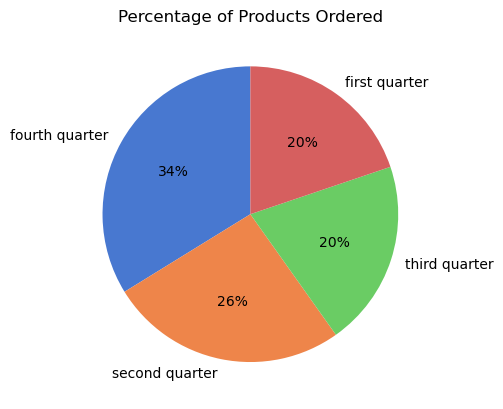

In [25]:
sorted_count = new_sales_data['Time_of_year'].value_counts()

palette_color = sns.color_palette('muted')
plt.pie(sorted_count, labels = sorted_count.index, colors = palette_color, startangle=90, autopct='%.0f%%')
plt.title('Percentage of Products Ordered');

> 34% of products ordered are in the fourth quarter, which is the highest amongst others.

> 26% of products ordered are in the second quarter, coming up as the second highest.

> Having the fourth and second quarter of the year to be the quarters with highest orders can be pointing to an idea that people usually make orders during festive periods more than in other times of the year.

> Looking at the months with the highest average December, November and October having the average highest number of orders with April, following next. Theses months either have festive days or are close to them. Making them a very suitable period to buy gifts and benefit from discounts and flash sales.

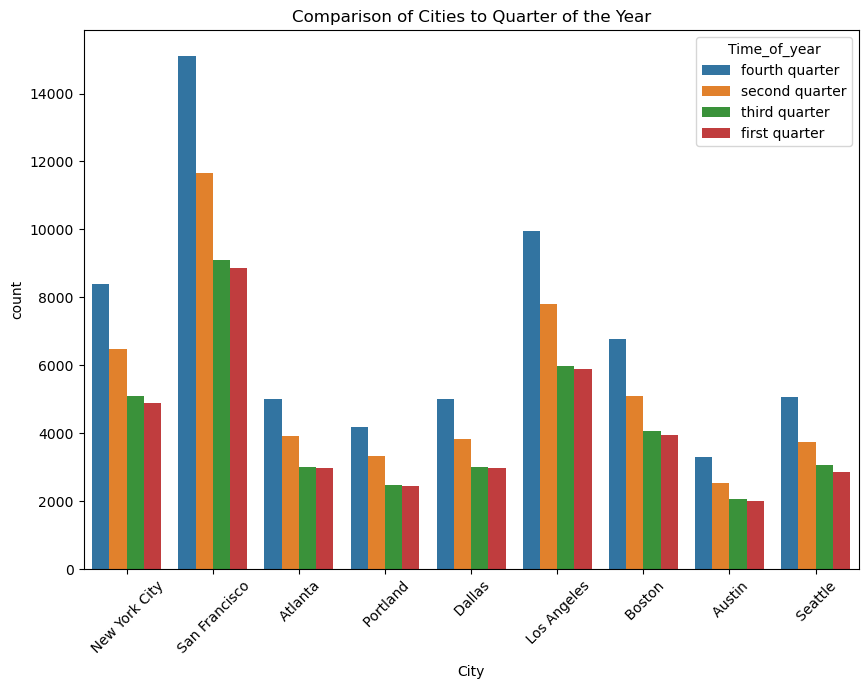

In [26]:
plt.figure(figsize=[10,7])
plt.xticks(rotation=45)
plt.title('Comparison of Cities to Quarter of the Year')
h_order = ['fourth quarter', 'second quarter', 'third quarter', 'first quarter']

sns.countplot(data=new_sales_data, x='City', hue='Time_of_year', hue_order=h_order);

> There is a constant pattern among all the four quarters of the year.

> The fourth quarter tops across all the quarters, seconded by the second quarter.

> The last quarters seems to be maintaining a similar pattern as their superiors with the third quarter being higher in most of the cities except *Atlanta*, *Portland* and *Dallas* where there seems to be a close tie between them.

> *San Francisco* and *New York City* generally has the highest number of orders. Being a desired place of residence for wealthy individuals, it is understood that they will have more purchasing power. With *Los Angeles* coming up next and also falls under similar living conditions as it's better counterparts.

> We can also deduce that in the top three performing cities, there is big gap between the top two quarters and the least two quarters.

In [27]:
# Define your groups
levels = {
    'Home_appliances': ['Flatscreen TV', 'LG Washing Machine', 'LG Dryer'],
    'Laptop': ['Macbook Pro Laptop', 'ThinkPad Laptop'],
    'Phone': ['iPhone', 'Google Phone', 'Vareebadd Phone'],
    'Charging_cable': ['USB-C Charging Cable', 'Lightning Charging Cable'],
    'Headphone': ['Wired Headphones', 'Apple Airpods Headphones', 'Bose SoundSport Headphones'],
    'Battery': ['AAA Batteries (4-pack)', 'AA Batteries (4-pack)'], 
    'Monitor': ['27in FHD Monitor', '27in 4K Gaming Monitor', '34in Ultrawide Monitor', '20in Monitor']
}

group_column('Product_category', 'Product', levels)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Time_of_year,Product_category
4718,241199,Lightning Charging Cable,1,14.95,2019-08-27 19:25:00,"713 Walnut St, Seattle, WA 98101",8,14.95,Seattle,19,third quarter,Charging_cable
1859,249930,AA Batteries (4-pack),1,3.84,2019-09-08 14:07:00,"969 Meadow St, New York City, NY 10001",9,3.84,New York City,14,third quarter,Battery
18936,313756,Bose SoundSport Headphones,1,99.99,2019-12-13 16:41:00,"245 9th St, Portland, OR 97035",12,99.99,Portland,16,fourth quarter,Headphone
3557,299053,USB-C Charging Cable,1,11.95,2019-12-02 08:45:00,"956 Cherry St, Atlanta, GA 30301",12,11.95,Atlanta,8,fourth quarter,Charging_cable
8782,287189,Lightning Charging Cable,1,14.95,2019-11-17 12:06:00,"751 Lake St, New York City, NY 10001",11,14.95,New York City,12,fourth quarter,Charging_cable
20049,314820,Lightning Charging Cable,1,14.95,2019-12-13 10:40:00,"535 Lincoln St, New York City, NY 10001",12,14.95,New York City,10,fourth quarter,Charging_cable
6702,265756,AAA Batteries (4-pack),2,2.99,2019-10-27 19:06:00,"975 West St, New York City, NY 10001",10,5.98,New York City,19,fourth quarter,Battery
910,210789,AA Batteries (4-pack),1,3.84,2019-06-08 01:03:00,"958 Washington St, Atlanta, GA 30301",6,3.84,Atlanta,1,second quarter,Battery
7645,243988,27in FHD Monitor,1,149.99,2019-08-08 12:20:00,"301 South St, Boston, MA 02215",8,149.99,Boston,12,third quarter,Monitor
5957,265038,Flatscreen TV,1,300.00,2019-10-15 16:37:00,"6 4th St, Los Angeles, CA 90001",10,300.00,Los Angeles,16,fourth quarter,Home_appliances


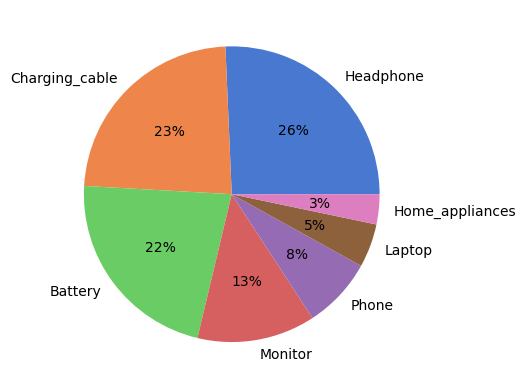

In [28]:
sorted_value = new_sales_data['Product_category'].value_counts()

palette_color = sns.color_palette('muted')
plt.pie(sorted_value, labels = sorted_value.index, colors = palette_color, autopct='%.0f%%');

> *Headphones* comes out on top as the highest ranking item ordered with 26%. While *Charging cable* and *Battery* follows next with 23% and 22% respectively.

> There seems to be a decrease in orders in respect to cost of products.

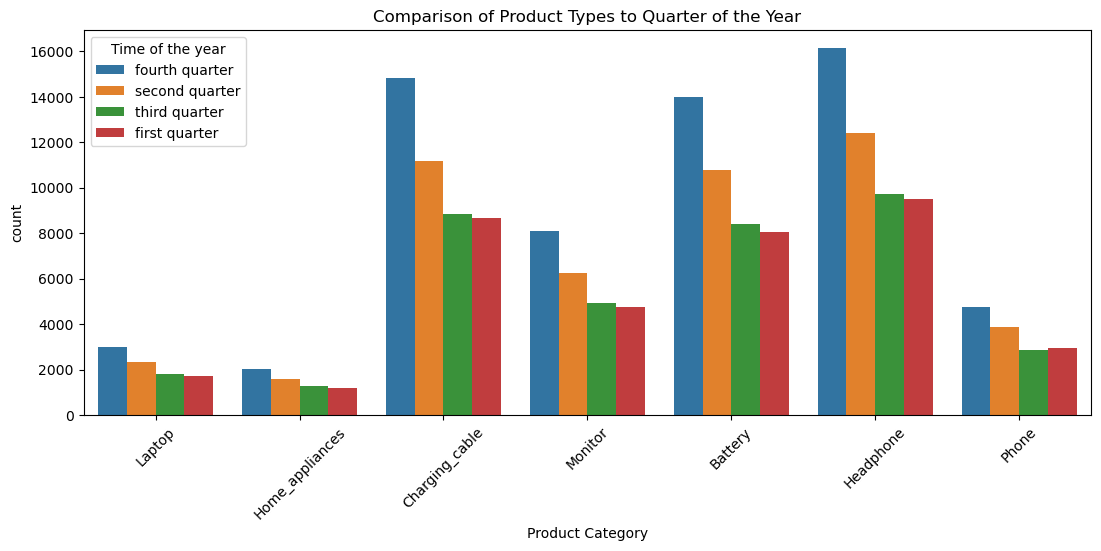

In [29]:
plt.figure(figsize=[13,5])

h_order = ['fourth quarter', 'second quarter', 'third quarter', 'first quarter']

sns.countplot(data=new_sales_data, x="Product_category", hue='Time_of_year', hue_order=h_order)

plt.title("Comparison of Product Types to Quarter of the Year")
plt.xlabel('Product Category')
plt.legend(loc=2, title='Time of the year')
plt.xticks(rotation=45);

> Headphones, charging cables and batteries are the most common items ordered.

> A similar pattern is shown across the four quarters of the year. This pattern can be seen across all the products.

> Apart from headphones, there is a decline in product orders in respect to it's prices. We can see that the more expensive items are ordered less compared to the much more cheaper ones.

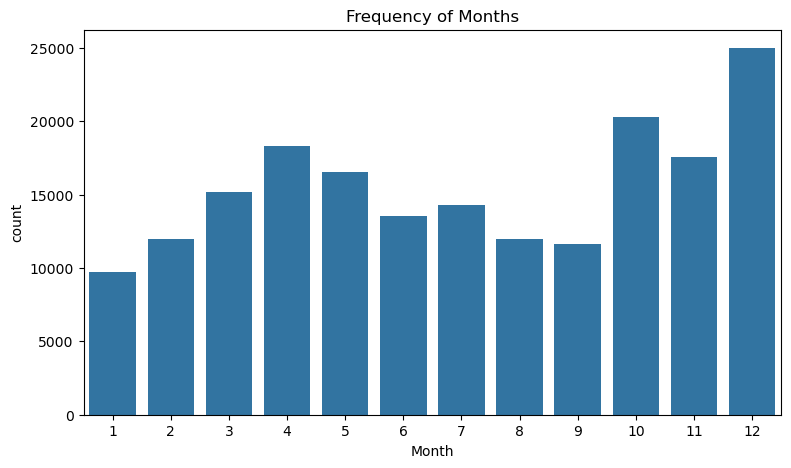

In [30]:
#sorted_values = new_sales_data['Month'].value_counts()
plt.figure(figsize=[9,5])
univariate_view("Month")
plt.title("Frequency of Months");

> The x-axis starts from 1 (January) to 12 (December). The numbers 1-12 represents January to December.

> Based on the above chart, December has the highest number of purchases with October coming second in order

> The top four months with the highest sales made is December, October, April and November respectively.

In [31]:
# Define the groups
category = {
    'small': [1, 2, 3],
    'medium': [4, 5, 6],
    'large': [7, 8, 9]
}

group_column('Quantity_Level', 'Quantity_Ordered', category)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Time_of_year,Product_category,Quantity_Level
18350,276862,iPhone,1,700.00,2019-10-03 19:21:00,"870 South St, Atlanta, GA 30301",10,700.00,Atlanta,19,fourth quarter,Phone,small
9248,257025,AA Batteries (4-pack),1,3.84,2019-09-21 10:07:00,"89 Lakeview St, Seattle, WA 98101",9,3.84,Seattle,10,third quarter,Battery,small
13442,272183,AA Batteries (4-pack),1,3.84,2019-10-24 23:49:00,"860 Sunset St, Los Angeles, CA 90001",10,3.84,Los Angeles,23,fourth quarter,Battery,small
19860,314642,Bose SoundSport Headphones,1,99.99,2019-12-30 11:17:00,"215 Cherry St, New York City, NY 10001",12,99.99,New York City,11,fourth quarter,Headphone,small
10241,269132,AAA Batteries (4-pack),1,2.99,2019-10-19 11:32:00,"816 Jefferson St, Dallas, TX 75001",10,2.99,Dallas,11,fourth quarter,Battery,small
8140,244460,ThinkPad Laptop,1,999.99,2019-08-17 14:31:00,"257 Washington St, Boston, MA 02215",8,999.99,Boston,14,third quarter,Laptop,small
9834,288197,27in FHD Monitor,1,149.99,2019-11-18 12:13:00,"694 Jefferson St, Seattle, WA 98101",11,149.99,Seattle,12,fourth quarter,Monitor,small
19554,314352,AAA Batteries (4-pack),1,2.99,2019-12-19 08:09:00,"400 Elm St, Seattle, WA 98101",12,2.99,Seattle,8,fourth quarter,Battery,small
6058,156275,Bose SoundSport Headphones,1,99.99,2019-02-22 11:30:00,"717 Lake St, Los Angeles, CA 90001",2,99.99,Los Angeles,11,first quarter,Headphone,small
8216,201902,AA Batteries (4-pack),2,3.84,2019-05-28 20:23:00,"807 Hill St, Dallas, TX 75001",5,7.68,Dallas,20,second quarter,Battery,small


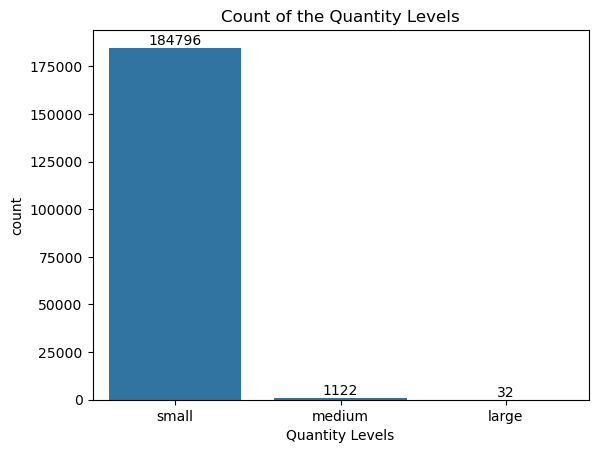

In [32]:
# view the univariate chart of quantity levels
ax = univariate_view('Quantity_Level')
plt.title('Count of the Quantity Levels')
plt.xlabel('Quantity Levels')

for bar in ax.containers:
    ax.bar_label(bar);

> Orders made in small quantities are the most common, enormously gaping its counterparts.

> Large quantities of orders are very few compared to other quantities.

### In conclusion, most people make orders in small quantites and the cheaper the product, the more likely customers are to order it.

> There are two periods of time in a year when customers are most likely to make orders. These time periods are in the fourth quarter and second quarter. These quarters fall under festive or holiday periods making it more convenient for customers to make orders.

> Three cities more spotligted to have a high number of orders coming in. These cities are *San Francisco*, *Los Angeles* and *New York City* respectively.

>Three products were found to be the most common items to be ordered, which are *Headphones*, *Charging Cable* and *Batteries*. With headphones being the most common product ordered.

### Recommendations

> Advertisements and customer engagements should be at it's peak during the fourth and second quarter when customers are most likely to make orders.

> Customers from areas like *San Francisco*, *Los Angeles* and *New York* should be really engaged and treated with priority as they contribute more in terms of sales made.